# Logistic regression

### Install packages

In [37]:
install.packages('ggcorrplot')
install.packages('ROCR')
install.packages('sjPlot')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘dplyr’, ‘sjstats’, ‘tidyr’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [46]:
install.packages('dplyr')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Load library

In [3]:
library(ggplot2)
library(ggcorrplot)

### Load and read dataset

Source: https://www.kaggle.com/ronitf/heart-disease-uci/data

Datafields:

* age = age in years
* sex(1 = male; 0 = female)
* cp = chest pain type
* trestbps = resting blood pressure (in mm Hg on admission to the hospital)
* chol = serum cholestoral in mg/dl
* fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg = resting electrocardiographic results
* thalach = maximum heart rate achieved
* exang = exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
* ca = number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target = 1 or 0

In [4]:
heart_disease_data <- read.csv('datasets/heart.csv')

head(heart_disease_data, 10)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
dim(heart_disease_data)

[1] 303  14

### Structure of dataset

In [6]:
str(heart_disease_data)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


In [7]:
colSums(is.na(heart_disease_data))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

In [8]:
table(heart_disease_data$target)


  0   1 
138 165 

### Visualizing relationship in Dataset

In [9]:
options(repr.plot.width = 6, repr.plot.height = 5)

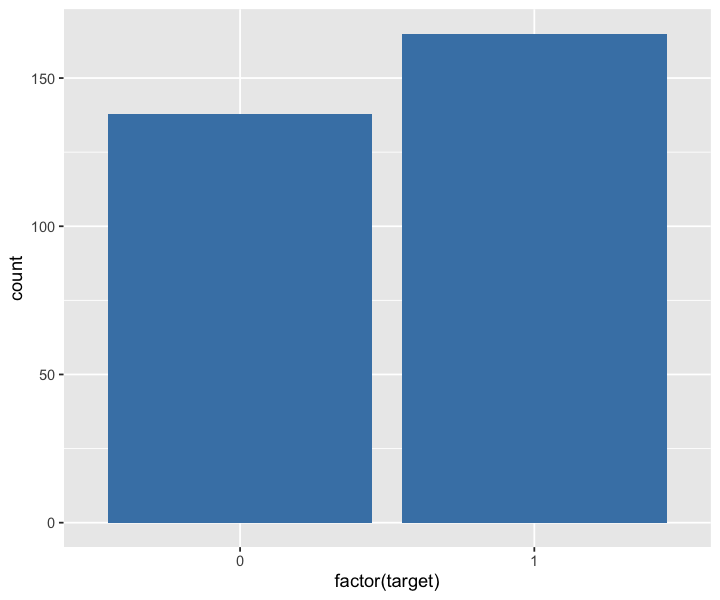

In [10]:
ggplot(aes(x = factor(target)), data = heart_disease_data) +
geom_bar(fill = 'steelblue')

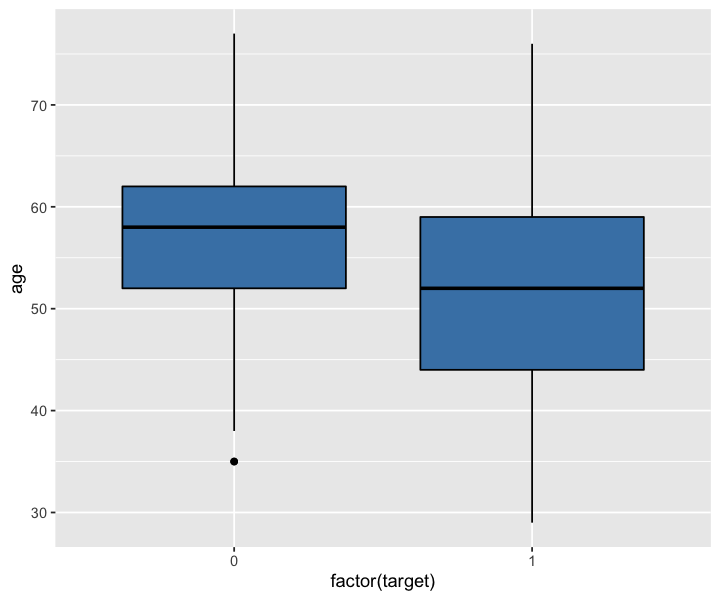

In [11]:
ggplot(aes(x = factor(target), y = age), data = heart_disease_data) +
geom_boxplot(col = 'black', fill = 'steelblue' )

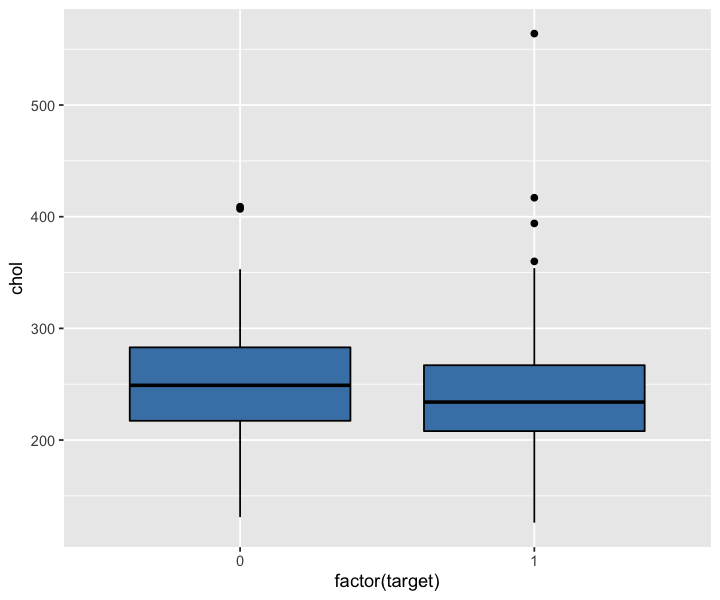

In [12]:
ggplot(aes(x = factor(target), y = chol), data = heart_disease_data) +
geom_boxplot(col = 'black', fill = 'steelblue' )

### Correlation

In [13]:
heart_data_corr <- round(cor(heart_disease_data), 1)

heart_data_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,-0.1,-0.1,0.3,0.2,0.1,-0.1,-0.4,0.1,0.2,-0.2,0.3,0.1,-0.2
sex,-0.1,1.0,0.0,-0.1,-0.2,0.0,-0.1,0.0,0.1,0.1,0.0,0.1,0.2,-0.3
cp,-0.1,0.0,1.0,0.0,-0.1,0.1,0.0,0.3,-0.4,-0.1,0.1,-0.2,-0.2,0.4
trestbps,0.3,-0.1,0.0,1.0,0.1,0.2,-0.1,0.0,0.1,0.2,-0.1,0.1,0.1,-0.1
chol,0.2,-0.2,-0.1,0.1,1.0,0.0,-0.2,0.0,0.1,0.1,0.0,0.1,0.1,-0.1
fbs,0.1,0.0,0.1,0.2,0.0,1.0,-0.1,0.0,0.0,0.0,-0.1,0.1,0.0,0.0
restecg,-0.1,-0.1,0.0,-0.1,-0.2,-0.1,1.0,0.0,-0.1,-0.1,0.1,-0.1,0.0,0.1
thalach,-0.4,0.0,0.3,0.0,0.0,0.0,0.0,1.0,-0.4,-0.3,0.4,-0.2,-0.1,0.4
exang,0.1,0.1,-0.4,0.1,0.1,0.0,-0.1,-0.4,1.0,0.3,-0.3,0.1,0.2,-0.4
oldpeak,0.2,0.1,-0.1,0.2,0.1,0.0,-0.1,-0.3,0.3,1.0,-0.6,0.2,0.2,-0.4


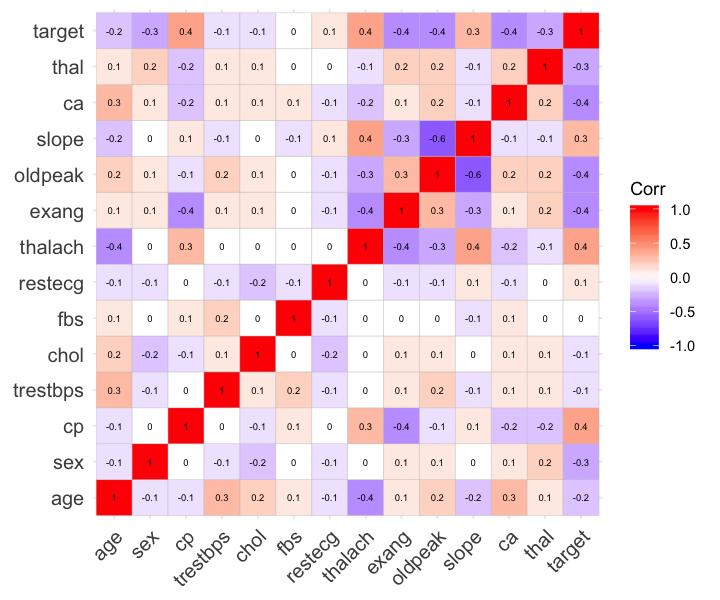

In [14]:
ggcorrplot(heart_data_corr, lab = TRUE, lab_size = 2)

### Split dataset into train and test

In [15]:
require(caTools)

Loading required package: caTools


In [16]:
set.seed(1234)

mask <- sample.split(heart_disease_data$target, SplitRatio = 0.70)

In [17]:
training_data <- subset(heart_disease_data, mask == T)
testing_data <- subset(heart_disease_data, mask == F)

### Size of traing and testing

In [18]:
nrow(heart_disease_data)

[1] 303

In [19]:
nrow(training_data)

[1] 212

In [20]:
nrow(testing_data)

[1] 91

### Structures of traing, testing dataset 

In [21]:
str(training_data)

'data.frame':	212 obs. of  14 variables:
 $ age     : int  63 37 41 56 56 44 57 48 49 58 ...
 $ sex     : int  1 1 0 1 0 1 1 0 1 0 ...
 $ cp      : int  3 2 1 1 1 1 2 2 1 3 ...
 $ trestbps: int  145 130 130 120 140 120 150 130 130 150 ...
 $ chol    : int  233 250 204 236 294 263 168 275 266 283 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : int  0 1 0 1 0 1 1 1 1 0 ...
 $ thalach : int  150 187 172 178 153 173 174 139 171 162 ...
 $ exang   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 1.3 0 1.6 0.2 0.6 1 ...
 $ slope   : int  0 0 2 2 1 2 2 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 3 2 2 2 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


In [22]:
str(testing_data)

'data.frame':	91 obs. of  14 variables:
 $ age     : int  57 57 52 54 64 50 71 51 65 46 ...
 $ sex     : int  0 1 1 1 1 0 0 1 0 0 ...
 $ cp      : int  0 0 2 0 3 2 1 2 2 2 ...
 $ trestbps: int  120 140 172 140 110 120 160 110 140 142 ...
 $ chol    : int  354 192 199 239 211 219 302 175 417 177 ...
 $ fbs     : int  0 0 1 0 0 0 0 0 1 0 ...
 $ restecg : int  1 1 1 1 0 1 1 1 0 0 ...
 $ thalach : int  163 148 162 160 144 158 162 123 157 160 ...
 $ exang   : int  1 0 0 0 1 0 0 0 0 1 ...
 $ oldpeak : num  0.6 0.4 0.5 1.2 1.8 1.6 0.4 0.6 0.8 1.4 ...
 $ slope   : int  2 1 2 2 1 1 2 2 2 0 ...
 $ ca      : int  0 0 0 0 0 0 2 0 1 0 ...
 $ thal    : int  2 1 3 2 2 2 2 2 2 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


### Find model using all independent variables

In [23]:
logistic_model <- glm(target ~ ., family = binomial, data = training_data) 

logistic_model$coefficients

(Intercept)         age         sex          cp    trestbps        chol 
 5.60990819 -0.03649532 -1.63282923  0.83095308 -0.01190031 -0.01088837 
        fbs     restecg     thalach       exang     oldpeak       slope 
 0.78244664  0.40502374  0.01772035 -1.48510899 -0.27373723  0.87101307 
         ca        thal 
-0.89843773 -0.80031723

In [24]:
summary(logistic_model)


Call:
glm(formula = target ~ ., family = binomial, data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0205  -0.3630   0.1357   0.5130   2.6453  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.609908   3.390112   1.655 0.097968 .  
age         -0.036495   0.028086  -1.299 0.193797    
sex         -1.632829   0.566995  -2.880 0.003979 ** 
cp           0.830953   0.224161   3.707 0.000210 ***
trestbps    -0.011900   0.014200  -0.838 0.401990    
chol        -0.010888   0.005434  -2.004 0.045117 *  
fbs          0.782447   0.684547   1.143 0.253033    
restecg      0.405024   0.436857   0.927 0.353859    
thalach      0.017720   0.012194   1.453 0.146161    
exang       -1.485109   0.561866  -2.643 0.008213 ** 
oldpeak     -0.273737   0.252876  -1.082 0.279032    
slope        0.871013   0.399912   2.178 0.029405 *  
ca          -0.898438   0.235552  -3.814 0.000137 ***
thal        -0.800317   0.368900  -2.169 

In [25]:
require(sjPlot)

### Forest plot for estimatation

https://en.wikipedia.org/wiki/Forest_plot

https://en.wikipedia.org/wiki/Odds_ratio

https://www.students4bestevidence.net/blog/2016/07/11/tutorial-read-forest-plot/

Odd ratio is calculated by taking exponential of Coefficients. So here we are calculating the odd ratios and then by using exp() function and then plotting it. For this we are using plot_model function which calculates the odd ratios of the features andf then plot it.

In [26]:
odds_ratio <- exp(coef(logistic_model))

odds_ratio

(Intercept)         age         sex          cp    trestbps        chol 
273.1191619   0.9641626   0.1953760   2.2955055   0.9881702   0.9891707 
        fbs     restecg     thalach       exang     oldpeak       slope 
  2.1868161   1.4993381   1.0178783   0.2264777   0.7605319   2.3893302 
         ca        thal 
  0.4072053   0.4491864

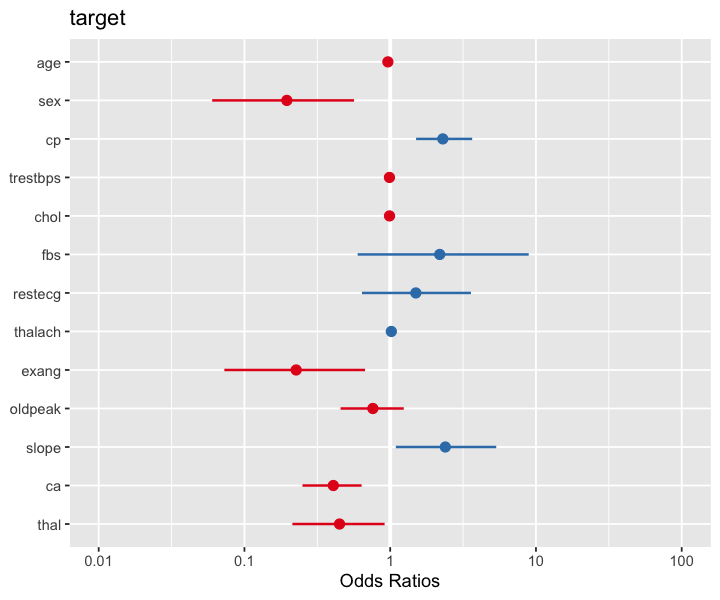

In [27]:
plot_model(logistic_model)

__The neutral line is vertical which is thicker than gride line at x-axis (`x = 1`), you can also change the color of neutral line as shown below.__

### Forest plot with value

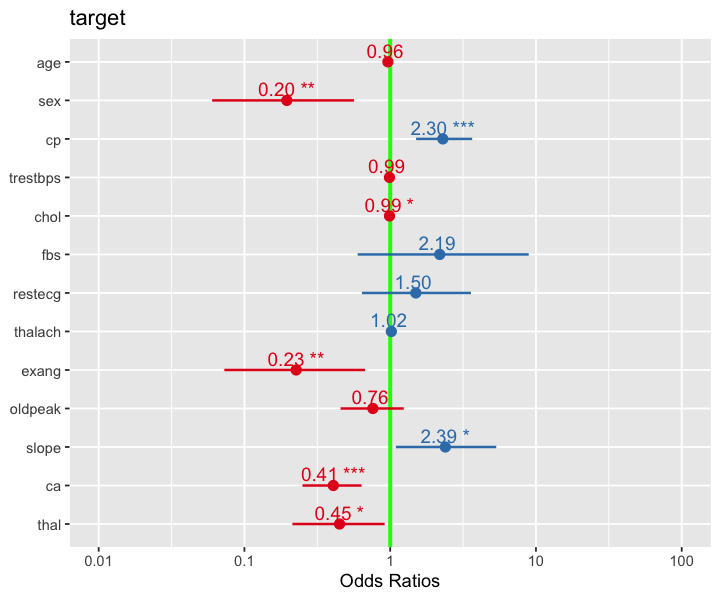

In [28]:
plot_model(logistic_model,
           vline.color = 'green',
           show.values = T,
           value.offset = .3)

### Predict on training dataset

In [29]:
predict_train <- predict(logistic_model, type = 'response')

### Build confusion matrix with a threshold value of 0.5

https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a

In [30]:
threshold_0.5 <- table(training_data$target, predict_train > 0.5)

threshold_0.5

   
    FALSE TRUE
  0    79   18
  1    13  102

In [31]:
accuracy_0.5 <- round(sum(diag(threshold_0.5)) / sum(threshold_0.5), 2)

accuracy_0.5

[1] 0.85

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [36]:
sensitivity_0.5 <- round(threshold_0.5[2, 2] / (threshold_0.5[2, 2] + threshold_0.5[2, 1]), 2)

sensitivity_0.5

[1] 0.89

In [37]:
specificity_0.5 <- round(threshold_0.5[1, 1] / (threshold_0.5[1, 1] + threshold_0.5[1, 2]), 2)

specificity_0.5

[1] 0.81

### Build confusion matrix with a threshold value of 0.7

In [38]:
threshold_0.7 <- table(training_data$target, predict_train > 0.7)

threshold_0.7

   
    FALSE TRUE
  0    87   10
  1    26   89

In [39]:
accuracy_0.7 <- round(sum(diag(threshold_0.7)) / sum(threshold_0.7), 2)

accuracy_0.7

[1] 0.83

In [40]:
sensitivity_0.7 <- round(threshold_0.7[2, 2] / (threshold_0.7[2, 2] + threshold_0.7[2, 1]), 2)

sensitivity_0.7

[1] 0.77

In [41]:
specificity_0.7 <- round(threshold_0.7[1, 1] / (threshold_0.7[1, 1] + threshold_0.7[1, 2]), 2)

specificity_0.7

[1] 0.9

### Create ROC curve

In [42]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



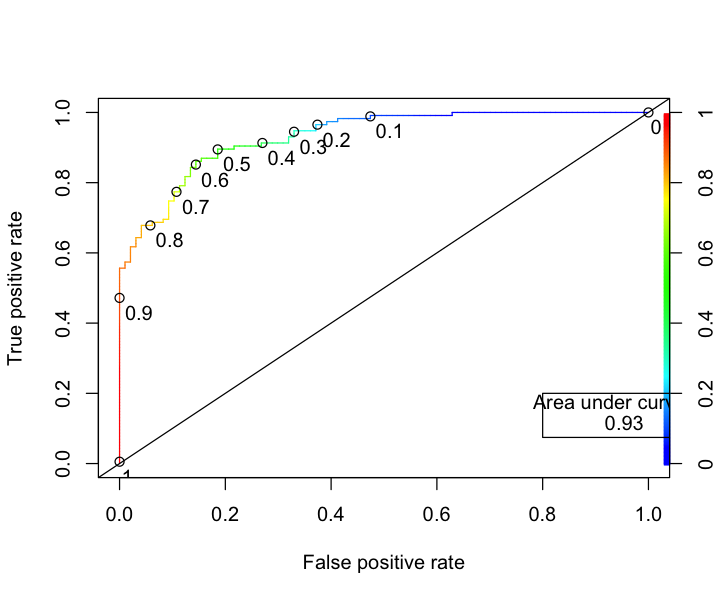

In [43]:
roc_prediction <- prediction(predict_train, training_data$target)
roc_performance <- performance(roc_prediction, 'tpr', 'fpr')

plot(roc_performance, colorize = T, print.cutoffs.at = seq(0, 1, 0.1), text.adj = c(-0.2, 1.5))
abline(a = 0, b = 1)

auc_train <- round(as.numeric(performance(roc_prediction, 'auc')@y.values), 2)
legend(.8, .2, auc_train, title = 'Area under curve', cex = 1)

### Prediction

In [44]:
predict_test <- predict(logistic_model, type = 'response', newdata = testing_data)

### Selecting threshold of `0.5` on the basis of above ROC curve 

In [53]:
test_table <- table(testing_data$target, predict_test > 0.5)
test_table

   
    FALSE TRUE
  0    34    7
  1     9   41

### Test accuracy

In [54]:
test_accuracy <- round(sum(diag(test_table)) / sum(test_table), 2)

test_accuracy

[1] 0.82


https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://towardsdatascience.com/illustrating-predictive-models-with-the-roc-curve-67e7b3aa8914

### Area under curve (AUC)

The area under curve is proposnal to accuracy of the model. So if area is higher that means model is more accurate.

In [55]:
roc_test_prediction <- prediction(predict_test, testing_data$target)

area_under_curve <- round(as.numeric(performance(roc_test_prediction, 'auc')@y.values), 2)

area_under_curve

[1] 0.88